In [3]:
import numpy as np 
import pandas as pd 
from statistics import *
import matplotlib.pyplot as plt

In [6]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
encoded_x, encoded_y = trainEncoder()
model_1.fit(encoded_x,encoded_y)

In [ ]:
#Helpers

In [ ]:
# Gets rid of rows with null

In [ ]:
# Encodes categorical training data and returns encoded predictios and y

def trainEncoder():
    
    # Load Encoder
    le = LabelEncoder()

    label_homePlanet = le.fit_transform(space_df['HomePlanet'])
    label_cryoSleep = le.fit_transform(space_df['CryoSleep'])
    label_destination = le.fit_transform(space_df['Destination'])
    label_vip = le.fit_transform(space_df['VIP'])
    
    deck = cabinSpliterTrain()[0]
    num = cabinSpliterTrain()[1]
    side = cabinSpliterTrain()[2]
    
    label_deck = le.fit_transform(deck)
    label_num = le.fit_transform(num)
    label_side = le.fit_transform(side)

    logistic_selected_x = space_df.loc[:, ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
    logistic_selected_x['HomePlanet'] = label_homePlanet
    logistic_selected_x['CryoSleep'] = label_cryoSleep
    logistic_selected_x['Destination'] = label_destination
    logistic_selected_x['VIP'] = label_vip
    logistic_selected_x['Deck'] = label_deck
    logistic_selected_x['Num'] = label_num
    logistic_selected_x['Side'] = label_side
    logistic_selected_y = le.fit_transform(space_df['Transported'])
    
    return logistic_selected_x, logistic_selected_y

In [ ]:
# TEST Gather all selected features
# TEST Encode categorical data
def testEncoder():
    le = LabelEncoder()
    test_label_homePlanet = le.fit_transform(space_test_df['HomePlanet'])
    test_label_cryoSleep = le.fit_transform(space_test_df['CryoSleep'])
    test_label_destination = le.fit_transform(space_test_df['Destination'])
    test_label_vip = le.fit_transform(space_test_df['VIP'])
    
    deck, num, side = cabinSpliterTest()
    
    test_label_deck = le.fit_transform(deck)
    test_label_num = le.fit_transform(num)
    test_label_side = le.fit_transform(side)
    
    # Combin with continuous one
    test_logistic_selected_x = space_test_df.loc[:, ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
    test_logistic_selected_x['HomePlanet'] = test_label_homePlanet
    test_logistic_selected_x['CryoSleep'] = test_label_cryoSleep
    test_logistic_selected_x['Destination'] = test_label_destination
    test_logistic_selected_x['VIP'] = test_label_vip
    test_logistic_selected_x['Deck'] = test_label_deck
    test_logistic_selected_x['Num'] = test_label_num
    test_logistic_selected_x['Side'] = test_label_side

    return test_logistic_selected_x

In [ ]:
def accuracyTest(real, predicted):
    
    return (1 - sum(abs(real - predicted))/len(real))

# Read In Data

In [13]:
import chardet

file_path = '../data/train.csv'
# Detect file encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    detected_encoding = result['encoding']
    print(f"Detected encoding: {detected_encoding}")

# Read the CSV file using the detected encoding
try:
    df = pd.read_csv(file_path, encoding=detected_encoding)
    print("DataFrame read with detected encoding:")
    print(df.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError with detected encoding: {e}")

Detected encoding: Windows-1252
DataFrame read with detected encoding:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  

In [17]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

# EDA

### Distribution Of Labels

<AxesSubplot:xlabel='sentiment'>

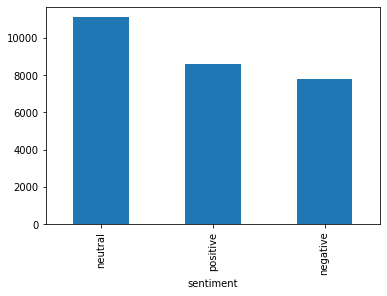

In [18]:
df['sentiment'].value_counts().plot(kind='bar')

### Distribution of Time Of Tweet

<AxesSubplot:xlabel='Time of Tweet'>

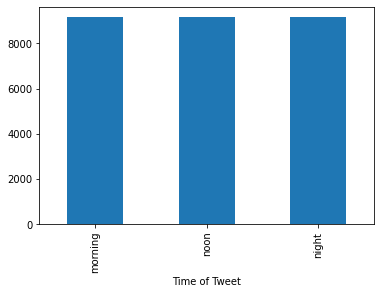

In [22]:
df['Time of Tweet'].value_counts().plot(kind='bar')

### Correlation with Sentiment

##### Seems to gave nearly no correlation

In [29]:
df_morning = df[df['Time of Tweet']=='morning']
df_morning['sentiment'].value_counts()#.plot(kind='bar')

sentiment
neutral     3763
positive    2837
negative    2561
Name: count, dtype: int64

In [30]:
df_noon = df[df['Time of Tweet']=='noon']
df_noon['sentiment'].value_counts()#.plot(kind='bar')

sentiment
neutral     3675
positive    2883
negative    2602
Name: count, dtype: int64

In [28]:
df_night = df[df['Time of Tweet']=='night']
df_night['sentiment'].value_counts()

sentiment
neutral     3680
positive    2862
negative    2618
Name: count, dtype: int64

### Distribution of Age Group

<AxesSubplot:xlabel='Age of User'>

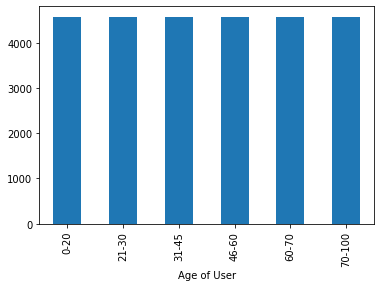

In [21]:
df['Age of User'].value_counts().plot(kind='bar')

### Correlation with sentiment

<AxesSubplot:xlabel='sentiment'>

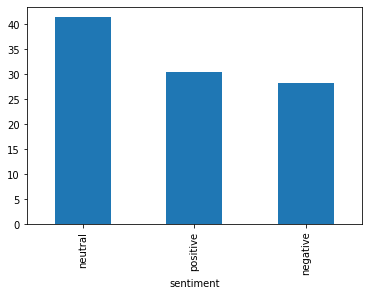

In [34]:
df_20 = df[df['Age of User']=='0-20']
temp_sum = sum(df_20['sentiment'].value_counts())
(df_20['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

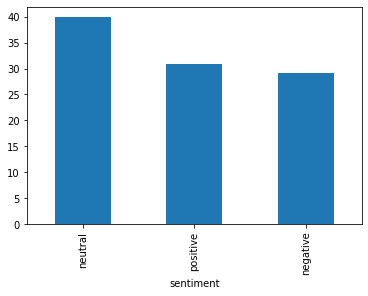

In [36]:
df_30 = df[df['Age of User']=='21-30']
temp_sum = sum(df_30['sentiment'].value_counts())
(df_30['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

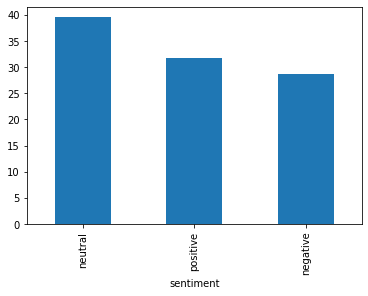

In [37]:
df_45 = df[df['Age of User']=='31-45']
temp_sum = sum(df_45['sentiment'].value_counts())
(df_45['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

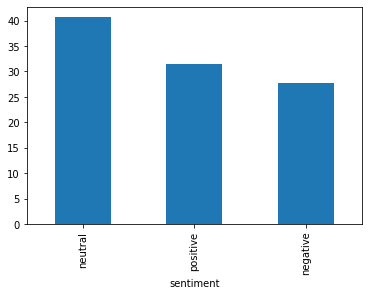

In [38]:
df_60 = df[df['Age of User']=='46-60']
temp_sum = sum(df_60['sentiment'].value_counts())
(df_60['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

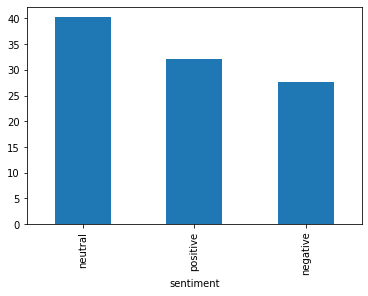

In [40]:
df_70 = df[df['Age of User']=='60-70']
temp_sum = sum(df_70['sentiment'].value_counts())
(df_70['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

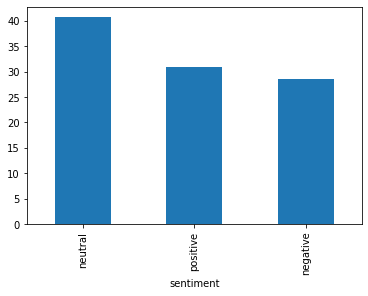

In [41]:
df_100 = df[df['Age of User']=='70-100']
temp_sum = sum(df_100['sentiment'].value_counts())
(df_100['sentiment'].value_counts()*100/temp_sum).plot(kind='bar')

### Distribution Of Population

In [53]:
df_neutral = df[df['sentiment']=='neutral']
mean(df_neutral['Population -2020'])

39971856.32541824

In [54]:
df_positive = df[df['sentiment']=='positive']
mean(df_positive['Population -2020'])

40474615.76415754

In [55]:
df_negative = df[df['sentiment']=='negative']
mean(df_negative['Population -2020'])

40170007.18390952

In [56]:
# Group by country and sentiment, then calculate counts
sentiment_counts = df.groupby(['Country', 'sentiment']).size().unstack(fill_value=0)

# Calculate total sentiments per country
sentiment_totals = sentiment_counts.sum(axis=1)

# Calculate sentiment ratios
sentiment_ratios = sentiment_counts.div(sentiment_totals, axis=0)

# Get population data for each country
population = df[['Country', 'Population -2020']].drop_duplicates().set_index('Country')

# Combine sentiment ratios with population data
sentiment_ratios = sentiment_ratios.join(population)

print(sentiment_ratios)


             negative   neutral  positive  Population -2020
Country                                                    
Afghanistan  0.268456  0.442953  0.288591          38928346
Albania      0.315436  0.395973  0.288591           2877797
Algeria      0.342282  0.369128  0.288591          43851044
Andorra      0.315436  0.362416  0.322148             77265
Angola       0.322148  0.362416  0.315436          32866272
...               ...       ...       ...               ...
Venezuela    0.149606  0.440945  0.409449          28435940
Vietnam      0.228346  0.440945  0.330709          97338579
Yemen        0.330709  0.385827  0.283465          29825964
Zambia       0.251969  0.346457  0.401575          18383955
Zimbabwe     0.291339  0.354331  0.354331          14862924

[195 rows x 4 columns]


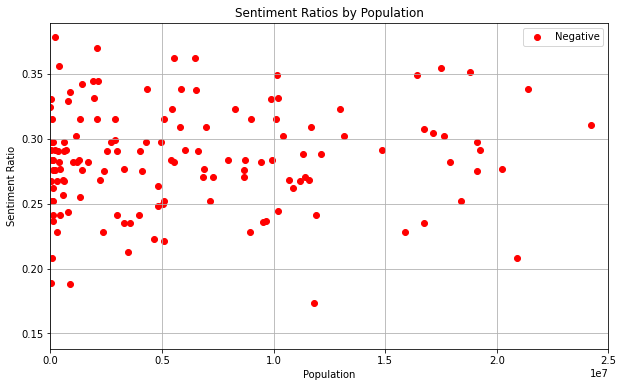

In [64]:
# Plot positive sentiment ratio against population
plt.figure(figsize=(10, 6))
# plt.scatter(sentiment_ratios['Population -2020'], sentiment_ratios['positive'], label='Positive', color='g')
plt.scatter(sentiment_ratios['Population -2020'], sentiment_ratios['negative'], label='Negative', color='r')
plt.xlabel('Population')
plt.ylabel('Sentiment Ratio')
plt.xlim(0,0.25*1e8)
plt.title('Sentiment Ratios by Population')
plt.legend()
plt.grid(True)
plt.show()
